In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
t = pd.read_csv('./data/Air_Traffic_Passenger_Statistics.csv')
t.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [4]:
from datetime import datetime
t['Activity Period'] = pd.to_datetime(t['Activity Period'], format='%Y%m')


In [63]:
airs = t.groupby(['Operating Airline']).agg(['sum'])['Passenger Count'].reset_index().sort_values(by=['sum'], ascending=False)['Operating Airline'][0:7].to_list()
airs.pop(1)
airs

['United Airlines',
 'SkyWest Airlines',
 'American Airlines',
 'Virgin America',
 'Delta Air Lines',
 'Southwest Airlines']

In [64]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return "{:,}".format(int(x))

formatter = FuncFormatter(millions)

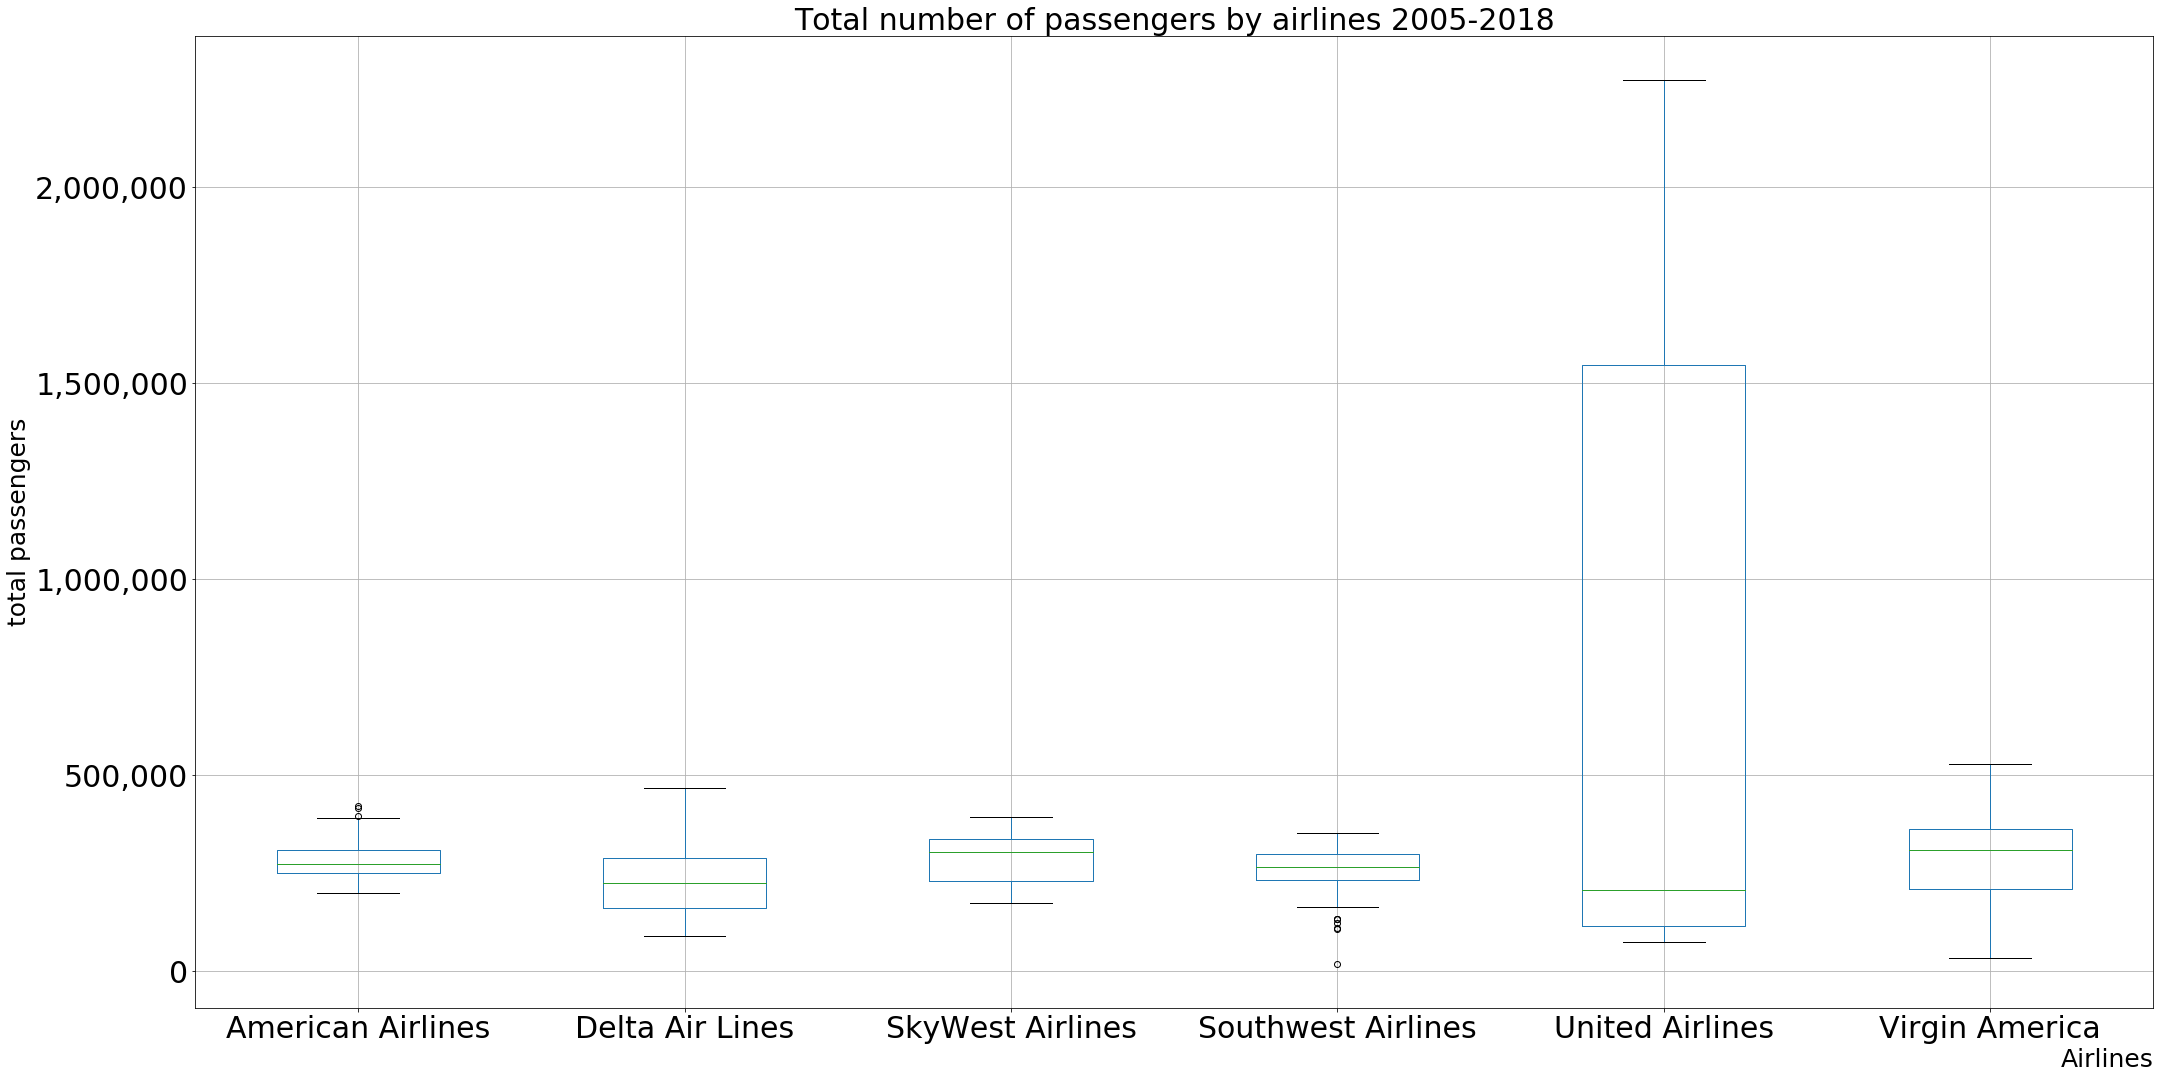

In [69]:
fig, ax = plt.subplots(figsize=(34,18))
x = t[t['Operating Airline'].isin(airs)]
s = x.groupby(['Operating Airline', 'Activity Period']).agg(['sum'])['Passenger Count'].reset_index()
s.drop(['Activity Period'], axis=1, inplace=True)
s.boxplot(by='Operating Airline', ax=ax, fontsize=30)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
plt.title('Total number of passengers by airlines 2005-2018', fontsize=30)
plt.xlabel("Airlines", horizontalalignment='right', x=1.0, y = 10, fontsize=25);
plt.ylabel("total passengers", fontsize=25);
plt.suptitle("")
ax.tick_params(labelsize=30)
plt.savefig('./plots/boxplot.png')

In [16]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)

In [18]:
data.shape

(95, 1)

In [24]:
d2.shape

(95, 1)

In [25]:
d2[::2,0].shape

(48,)

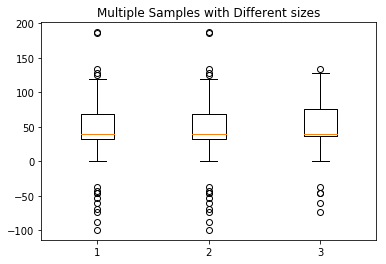

In [26]:
data = [data, d2, d2[::2,0]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()